In [3]:
from tensorflow import keras
import pandas as pd

In [70]:
from glob import glob
files = glob("C:/Users/Playdata/Downloads/validation-20250328T054312Z-001/dogcat/**/*.jpg",recursive=True)
print('총 파일개수',len(files))

총 파일개수 800


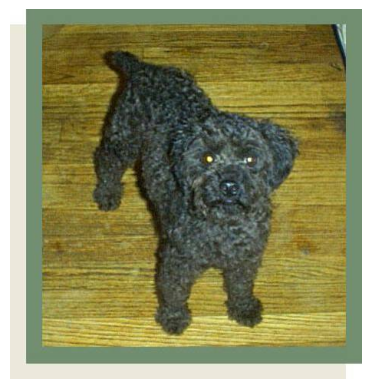

In [71]:
import matplotlib.pylab as plt
import cv2
# 이미지 파일 경로 가져오기
img_path = files[799]

# OpenCV로 이미지 읽기 (BGR → RGB 변환)
img = cv2.imread(img_path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# 이미지 출력
plt.imshow(img)
plt.axis('off')  # 축 제거
plt.show()

In [72]:
data = []
img_size = (128,128)
for file in files:
    img = cv2.imread(file)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    resize_img = cv2.resize(img, img_size)
    data.append(resize_img)

data = np.array(data)

In [73]:
from sklearn.model_selection import train_test_split
import numpy as np
label = np.array([0]*400 + [1]*400)
files = np.array(files)
X_tr, X_val, y_tr, y_val = train_test_split(data, label, test_size=0.2, random_state=42, stratify=label, shuffle=True)

In [75]:
print("훈련 데이터 크기:", X_tr.shape)
print("검증 데이터 크기:", X_val.shape)
print("훈련 라벨 개수:", np.bincount(y_tr))  
print("검증 라벨 개수:", np.bincount(y_val))  

훈련 데이터 크기: (640, 128, 128, 3)
검증 데이터 크기: (160, 128, 128, 3)
훈련 라벨 개수: [320 320]
검증 라벨 개수: [80 80]


In [82]:
from tensorflow import keras
from tensorflow.keras.optimizers import Adam

# 모델 정의 (이진 분류)
input = keras.layers.Input(shape=(128,128,3))
hidden = keras.layers.RandomFlip('horizontal')(input)
hidden = keras.layers.RandomRotation(0.1)(hidden)
hidden = keras.layers.RandomZoom(0.1)(hidden)

hidden = keras.layers.Rescaling(1./255)(hidden)

hidden = keras.layers.Conv2D(16, (3,3), activation='relu')(hidden)
hidden = keras.layers.MaxPool2D()(hidden)
hidden = keras.layers.Dropout(0.25)(hidden)

hidden = keras.layers.Conv2D(32, (3,3), activation='relu')(hidden)
hidden = keras.layers.MaxPool2D()(hidden)
hidden = keras.layers.Dropout(0.25)(hidden)

hidden = keras.layers.Conv2D(64, (3,3), activation='relu')(hidden)

hidden = keras.layers.Flatten()(hidden)
hidden = keras.layers.Dense(128, activation='relu')(hidden)
hidden = keras.layers.Dropout(0.5)(hidden)

output = keras.layers.Dense(1, activation='sigmoid')(hidden)

model_api = keras.models.Model(input, output)

model_api.compile(optimizer=Adam(learning_rate=0.0005), loss='binary_crossentropy', metrics=['accuracy'])

model_api.summary()



Model: "functional_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_10 (InputLayer)     │ (None, 128, 128, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ random_flip_7 (RandomFlip)      │ (None, 128, 128, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ random_rotation_7               │ (None, 128, 128, 3)    │             0 │
│ (RandomRotation)                │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ random_zoom_7 (RandomZoom)      │ (None, 128, 128, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ rescaling_10 (Rescaling)        │ (None, 128, 128, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_30 (Conv2D)              │ (None, 126, 126, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_20 (MaxPooling2D) │ (None, 63, 63, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_30 (Dropout)            │ (None, 63, 63, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_31 (Conv2D)              │ (None, 61, 61, 32)     │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_21 (MaxPooling2D) │ (None, 30, 30, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_31 (Dropout)            │ (None, 30, 30, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_32 (Conv2D)              │ (None, 28, 28, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_10 (Flatten)            │ (None, 50176)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_20 (Dense)                │ (None, 128)            │     6,422,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_32 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_21 (Dense)                │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 6,446,369 (24.59 MB)

 Trainable params: 6,446,369 (24.59 MB)

 Non-trainable params: 0 (0.00 B)

In [83]:
history = model_api.fit(X_tr, y_tr, epochs=30, batch_size=16, validation_data=(X_val,y_val))

Epoch 1/30
40/40 ━━━━━━━━━━━━━━━━━━━━ 7s 113ms/step - accuracy: 0.4509 - loss: 0.8309 - val_accuracy: 0.5750 - val_loss: 0.6928
Epoch 2/30
40/40 ━━━━━━━━━━━━━━━━━━━━ 4s 111ms/step - accuracy: 0.5169 - loss: 0.6945 - val_accuracy: 0.5063 - val_loss: 0.6925
Epoch 3/30
40/40 ━━━━━━━━━━━━━━━━━━━━ 4s 109ms/step - accuracy: 0.5050 - loss: 0.6928 - val_accuracy: 0.5000 - val_loss: 0.6907
Epoch 4/30
40/40 ━━━━━━━━━━━━━━━━━━━━ 4s 112ms/step - accuracy: 0.5380 - loss: 0.6893 - val_accuracy: 0.5000 - val_loss: 0.6941
Epoch 5/30
40/40 ━━━━━━━━━━━━━━━━━━━━ 4s 110ms/step - accuracy: 0.5082 - loss: 0.6934 - val_accuracy: 0.5562 - val_loss: 0.6887
Epoch 6/30
40/40 ━━━━━━━━━━━━━━━━━━━━ 4s 111ms/step - accuracy: 0.6170 - loss: 0.6814 - val_accuracy: 0.5437 - val_loss: 0.6810
Epoch 7/30
40/40 ━━━━━━━━━━━━━━━━━━━━ 4s 107ms/step - accuracy: 0.5828 - loss: 0.6824 - val_accuracy: 0.5000 - val_loss: 0.7007
Epoch 8/30
40/40 ━━━━━━━━━━━━━━━━━━━━ 4s 110ms/step - accuracy: 0.5823 - loss: 0.6701 - val_accuracy: 0.

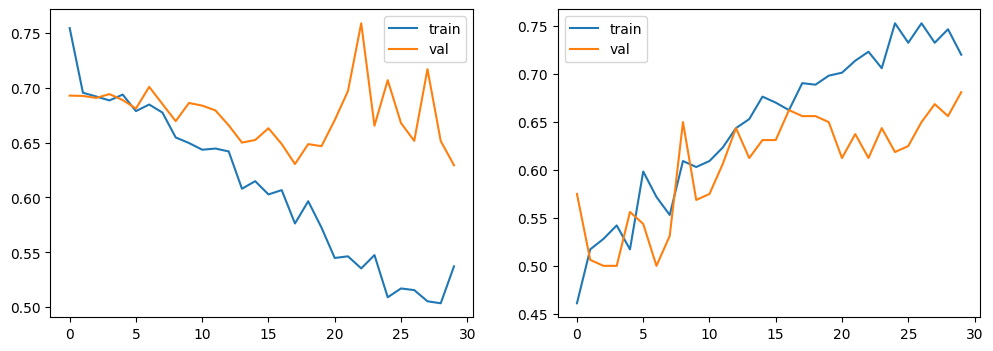

In [84]:
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.plot(history.history['loss'],label='train')
plt.plot(history.history['val_loss'],label='val')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['accuracy'],label='train')
plt.plot(history.history['val_accuracy'],label='val')
plt.legend()

plt.show()